<a href="https://colab.research.google.com/github/Carvas91/PyTroch/blob/main/Linear_regression_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt



In [2]:
torch.__version__

'2.6.0+cu124'

In [3]:
w = .7
b = .3

start = 0
end =1
step = .02
X = torch.arange(start,end,step).unsqueeze(1)

y = X*w + b

In [4]:
print(X[:10])
print(y[:10])

tensor([[0.0000],
        [0.0200],
        [0.0400],
        [0.0600],
        [0.0800],
        [0.1000],
        [0.1200],
        [0.1400],
        [0.1600],
        [0.1800]])
tensor([[0.3000],
        [0.3140],
        [0.3280],
        [0.3420],
        [0.3560],
        [0.3700],
        [0.3840],
        [0.3980],
        [0.4120],
        [0.4260]])


In [5]:
train_split = int(.8 * len(X))
train_split


40

In [6]:
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]



In [7]:
def plot_preds(train_data = X_train,
               train_labels = y_train,
               test_data = X_test,
               test_labels = y_test,
               preds=None):
  """ Plot preds"""
  plt.figure(figsize= (10,7))
  plt.scatter(train_data, train_labels, c="b", s=4, label= "training data")
  plt.scatter(test_data, test_labels, c= 'g', s=4, label='test data')
  if preds is not None:
    plt.scatter(test_data, preds, c="r", s=4, label= "preds")


  plt.legend(['train data',
              'test data',
              'preds'])
  plt.show()



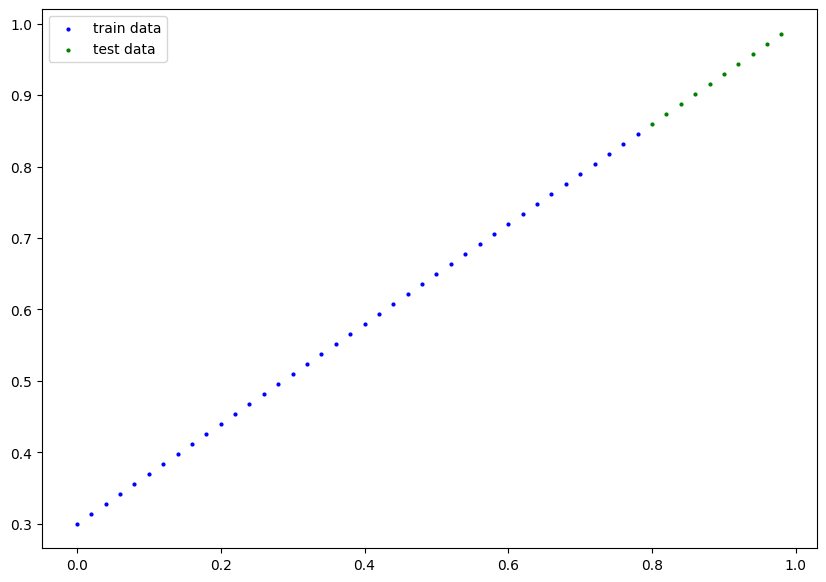

In [8]:
plot_preds()

In [9]:
class LinearRegModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1,
                                            requires_grad=True,
                                            dtype=torch.float))

    self.bias = nn.Parameter(torch.randn(1,
                                         requires_grad=True,
                                         dtype=torch.float))

  def forward(self, x: torch.Tensor)->torch.Tensor:
    return self.weights * x + self.bias





In [10]:
torch.manual_seed(42)

LReg = LinearRegModel()

list(LReg.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [11]:
list(LReg.named_parameters())

[('weights',
  Parameter containing:
  tensor([0.3367], requires_grad=True)),
 ('bias',
  Parameter containing:
  tensor([0.1288], requires_grad=True))]

In [12]:
for name,num in LReg.state_dict().items():
  print(name, num)

weights tensor([0.3367])
bias tensor([0.1288])


In [13]:
with torch.inference_mode():
  y_preds = LReg.forward(X_test)

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

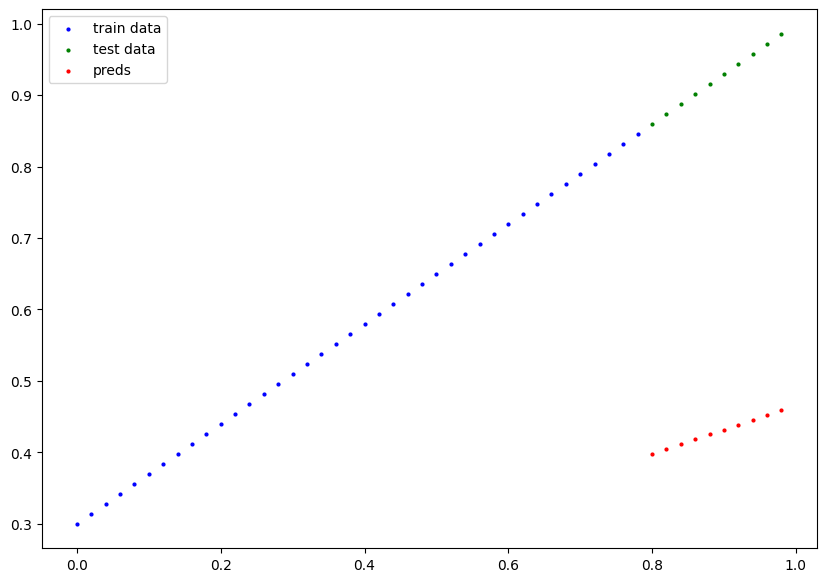

In [14]:
plot_preds(preds=y_preds)

In [15]:
lossfun = nn.L1Loss()
lossfun

L1Loss()

In [16]:
optimizer = torch.optim.SGD(params=LReg.parameters(),
                            lr=0.01)
optimizer

SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    fused: None
    lr: 0.01
    maximize: False
    momentum: 0
    nesterov: False
    weight_decay: 0
)

In [17]:
epochs = 200

epoch_count = []
loss_values = []
test_loss_values = []

for epoch in range(epochs):
  LReg.train()
  y_pred =LReg(X_train)

  loss = lossfun(y_pred, y_train)



  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  LReg.eval()
  with torch.inference_mode():
    test_pred = LReg(X_test)

    test_loss = lossfun(test_pred, y_test)

  if epoch%10 == 0:
    epoch_count.append(epoch)
    loss_values.append(loss.detach())
    test_loss_values.append(test_loss.detach())
    print(f'Epoch: {epoch},trainl loss: {loss}, test loss, {test_loss}')
    print(LReg.state_dict())




Epoch: 0,trainl loss: 0.31288138031959534, test loss, 0.48106518387794495
OrderedDict([('weights', tensor([0.3406])), ('bias', tensor([0.1388]))])
Epoch: 10,trainl loss: 0.1976713240146637, test loss, 0.3463551998138428
OrderedDict([('weights', tensor([0.3796])), ('bias', tensor([0.2388]))])
Epoch: 20,trainl loss: 0.08908725529909134, test loss, 0.21729660034179688
OrderedDict([('weights', tensor([0.4184])), ('bias', tensor([0.3333]))])
Epoch: 30,trainl loss: 0.053148526698350906, test loss, 0.14464017748832703
OrderedDict([('weights', tensor([0.4512])), ('bias', tensor([0.3768]))])
Epoch: 40,trainl loss: 0.04543796554207802, test loss, 0.11360953003168106
OrderedDict([('weights', tensor([0.4748])), ('bias', tensor([0.3868]))])
Epoch: 50,trainl loss: 0.04167863354086876, test loss, 0.09919948130846024
OrderedDict([('weights', tensor([0.4938])), ('bias', tensor([0.3843]))])
Epoch: 60,trainl loss: 0.03818932920694351, test loss, 0.08886633068323135
OrderedDict([('weights', tensor([0.5116

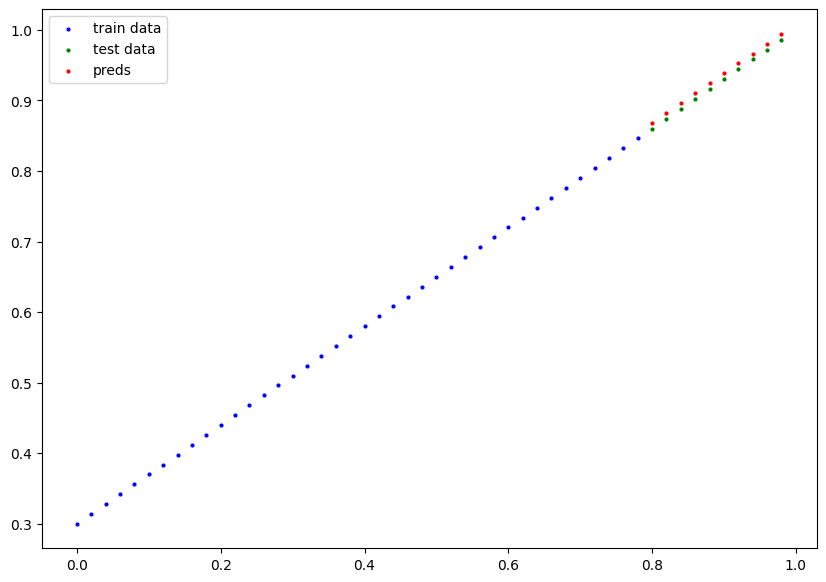

In [18]:
plot_preds(preds=test_pred)

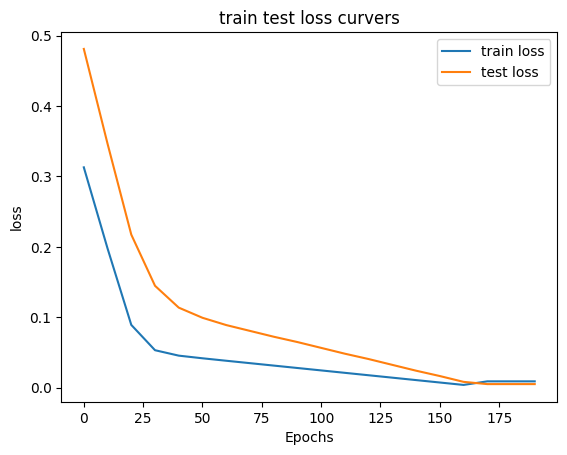

In [21]:
plt.plot(epoch_count, loss_values, label="train loss")
plt.plot(epoch_count, test_loss_values, label="test loss")
# plt.legend(['train', 'test'])
plt.legend()
plt.title("train test loss curvers")
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.show()

In [24]:
from pathlib import Path

MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok = True)

MODEL_NAME = "01_pytorch_workflow_model_0.pt"

MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

MODEL_SAVE_PATH

PosixPath('models/01_pytorch_workflow_model_0.pt')

In [25]:
torch.save(LReg.state_dict(), MODEL_SAVE_PATH)

In [28]:
!ls

models	sample_data


In [34]:
!ls -l models

total 4
-rw-r--r-- 1 root root 1680 May 17 15:03 01_pytorch_workflow_model_0.pt
